In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%%sh
ls

FitNotes.csv
FitNotes_Nov2020.csv
Workout_Tracker.ipynb
default.realm


In [6]:
sg_wkouts = pd.read_csv('FitNotes_Nov2020.csv')

In [7]:
sg_wkouts.head()

,Name,Start Date (UTC),Start Time (UTC),End Date (UTC),End Time (UTC),BodyWeight,Exercise,Equipment,Reps,Weight,Time,Distance,Status,Categories
0,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,"68,04",Barbell Row,Barbell,5.0,"9,07",NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms"
1,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,"68,04",Barbell Row,Barbell,5.0,"10,21",NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms"
2,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,"68,04",Barbell Row,Barbell,5.0,"11,34",NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms"
3,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,"68,04",Bench Press,Machine,5.0,"6,8",NaN,NaN,NotStarted,"Pectorals,Triceps"
4,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,"68,04",Bench Press,Machine,5.0,"7,94",NaN,NaN,NotStarted,"Pectorals,Triceps"


In [8]:
sg_wkouts.dtypes

Name                 object
Start Date (UTC)     object
Start Time (UTC)     object
End Date (UTC)       object
End Time (UTC)       object
BodyWeight           object
Exercise             object
Equipment            object
Reps                float64
Weight               object
Time                 object
Distance             object
Status               object
Categories           object
dtype: object

In [9]:
sg_wkouts.columns = ['name', 'start_date', 'start_time', 'end_date', 
                     'end_time', 'bodyweight', 'exercise', 'equipment', 
                     'Reps', 'Weight', 'Time', 'Distance', 'Status', 'Categories']

In [10]:
sg_wkouts['start'] = pd.to_datetime(sg_wkouts['start_date'] + ' ' + sg_wkouts['start_time'])

In [11]:
sg_wkouts['end'] = pd.to_datetime(sg_wkouts['end_date'] + ' ' + sg_wkouts['end_time'])

In [12]:
sg_wkouts['bodyweight'] = sg_wkouts['bodyweight'].apply(lambda x: x.replace(',', '.'))

sg_wkouts['bodyweight'] = pd.to_numeric(sg_wkouts['bodyweight'])

In [13]:
def str_float(some_str):
    try:
        some_str = some_str.replace(',', '.')
    except:
        some_str = -9999
    return some_str

In [14]:
sg_wkouts['Weight'] = sg_wkouts['Weight'].apply(lambda x: str_float(x))

In [15]:
sg_wkouts['Weight'] = pd.to_numeric(sg_wkouts['Weight'])

In [16]:
sg_wkouts.head()

,name,start_date,start_time,end_date,end_time,bodyweight,exercise,equipment,Reps,Weight,Time,Distance,Status,Categories,start,end
0,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,9.07,NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
1,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,10.21,NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
2,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,11.34,NaN,NaN,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
3,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,6.80,NaN,NaN,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20
4,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,7.94,NaN,NaN,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20


In [17]:
#sg_wkouts['Time'] = sg_wkouts['Time'].apply(lambda x: str_float(x))
sg_wkouts['Time'] = pd.to_datetime(sg_wkouts['Time'])

sg_wkouts['Distance'] = sg_wkouts['Distance'].apply(lambda x: str_float(x))
sg_wkouts['Distance'] = pd.to_numeric(sg_wkouts['Distance'])

In [18]:
sg_wkouts.head()

,name,start_date,start_time,end_date,end_time,bodyweight,exercise,equipment,Reps,Weight,Time,Distance,Status,Categories,start,end
0,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,9.07,NaT,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
1,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,10.21,NaT,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
2,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,11.34,NaT,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
3,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,6.80,NaT,-9999.0,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20
4,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,7.94,NaT,-9999.0,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20


In [19]:
def intrvl_split(time_intrvl):
    try:
        hh = time_intrvl.split(':')[0]
        mm = time_intrvl.split(':')[1]
        ss = time_intrvl.split(':')[2]
        tbr = hh/60 + mm + ss*60
    except:
        tbr = -999
        
    return tbr

In [20]:
sg_wkouts['Time'] = sg_wkouts.apply(lambda x: intrvl_split(x))

In [21]:
sg_wkouts['exercise'].unique()

array(['Barbell Row', 'Bench Press', 'Squat', 'Deadlift',
       'Overhead Press', 'Pullup', 'Running', 'Back Extension',
       'Standing Calf Raise', 'Split Squat', 'Chest Fly', 'Shoulder Fly',
       'Cable Crossover', 'Negative Pullups', 'Leg Press',
       'Shoulder Press', 'Front Squat', 'Machine Bench Press',
       'Shoulder Shrug', 'Dumbbell Press', 'Dips', 'Bike Ride'],
      dtype=object)

In [22]:
sg_wkouts.head()

,name,start_date,start_time,end_date,end_time,bodyweight,exercise,equipment,Reps,Weight,Time,Distance,Status,Categories,start,end
0,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,9.07,NaN,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
1,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,10.21,NaN,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
2,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Barbell Row,Barbell,5.0,11.34,NaN,-9999.0,NotStarted,"Upper Back,Lower Back,Abdominals,Hips,Arms",2018-01-27 05:45:45,2018-01-27 06:27:20
3,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,6.80,NaN,-9999.0,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20
4,Greyskulls A,1/27/2018,5:45:45 AM,1/27/2018,6:27:20 AM,68.04,Bench Press,Machine,5.0,7.94,NaN,-9999.0,NotStarted,"Pectorals,Triceps",2018-01-27 05:45:45,2018-01-27 06:27:20


In [39]:
sg_wkouts.tail()

,name,start_date,start_time,end_date,end_time,bodyweight,exercise,equipment,Reps,Weight,Time,Distance,Status,Categories,start,end,repsWeight,timeSpent
1826,Greyskulls B (Day 1),11/23/2020,5:19:25 AM,11/23/2020,6:11:04 AM,90.0,Barbell Row,Barbell,5.0,60.0,NaN,-9999.0,Done,"Upper Back,Lower Back,Abdominals,Hips,Arms",2020-11-23 05:19:25,2020-11-23 06:11:04,300.0,00:51:39
1827,Greyskulls B (Day 1),11/23/2020,5:19:25 AM,11/23/2020,6:11:04 AM,90.0,Barbell Row,Barbell,5.0,64.5,NaN,-9999.0,Done,"Upper Back,Lower Back,Abdominals,Hips,Arms",2020-11-23 05:19:25,2020-11-23 06:11:04,322.5,00:51:39
1828,Greyskulls B (Day 1),11/23/2020,5:19:25 AM,11/23/2020,6:11:04 AM,90.0,Barbell Row,Barbell,7.0,64.5,NaN,-9999.0,Done,"Upper Back,Lower Back,Abdominals,Hips,Arms",2020-11-23 05:19:25,2020-11-23 06:11:04,451.5,00:51:39
1829,Greyskulls B (Day 1),11/23/2020,5:19:25 AM,11/23/2020,6:11:04 AM,90.0,Deadlift,Barbell,5.0,90.0,NaN,-9999.0,NotStarted,"Glutes,Quads,Hamstring,Hips,Lower Back",2020-11-23 05:19:25,2020-11-23 06:11:04,450.0,00:51:39
1830,Greyskulls B (Day 1),11/23/2020,5:19:25 AM,11/23/2020,6:11:04 AM,90.0,Running,None,NaN,-9999.0,NaN,5.5,NotStarted,Cardio,2020-11-23 05:19:25,2020-11-23 06:11:04,NaN,00:51:39


In [23]:
sg_wkouts['repsWeight'] = sg_wkouts['Reps'] * sg_wkouts['Weight']

sg_wkouts.groupby(['exercise'])['repsWeight'].sum()

exercise
Back Extension              0.00
Barbell Row             51528.60
Bench Press             37024.35
Bike Ride                   0.00
Cable Crossover          1032.50
Chest Fly               34385.00
Deadlift                25231.78
Dips                        0.00
Dumbbell Press          32389.00
Front Squat             11467.50
Leg Press              122032.80
Machine Bench Press      5100.00
Negative Pullups            0.00
Overhead Press          31881.50
Pullup                      0.00
Running                     0.00
Shoulder Fly            22906.50
Shoulder Press            225.00
Shoulder Shrug          25640.00
Split Squat             32969.50
Squat                   46181.25
Standing Calf Raise     43527.90
Name: repsWeight, dtype: float64

### How much time have I spent at the gym? In total and on an average?

In [25]:
sg_wkouts['timeSpent'] = sg_wkouts['end'] - sg_wkouts['start']
c = sg_wkouts.loc[0, 'timeSpent']

print (c)

divmod(c.days * 86400 + c.seconds, 60)

0 days 00:41:35


(41, 35)

In [26]:
#sg_wkouts['timeSpent'] = sg_wkouts['end'] - sg_wkouts['start']

(sg_wkouts.groupby('exercise')
.agg({'exercise':'count', 'timeSpent': 'sum'})
.reset_index(drop = True)
#.sort_values(by = 'timeSpent', ascending = False)

)


,exercise,timeSpent
0,9,0 days 06:45:24
1,174,7 days 05:32:30
2,171,7 days 03:40:54
3,1,0 days 01:08:17
4,12,0 days 08:52:36
5,129,5 days 19:07:00
6,64,2 days 12:58:42
7,87,3 days 23:14:45
8,84,3 days 20:21:24
9,51,2 days 02:17:36


In [27]:
top5 = ['Barbell Row', 'Bench Press', 'Deadlift', 'Squat', 'Overhead Press']

In [29]:
sg_wkouts.dtypes

name                   object
start_date             object
start_time             object
end_date               object
end_time               object
bodyweight            float64
exercise               object
equipment              object
Reps                  float64
Weight                float64
Time                  float64
Distance              float64
Status                 object
Categories             object
start          datetime64[ns]
end            datetime64[ns]
repsWeight            float64
timeSpent     timedelta64[ns]
dtype: object

In [36]:
sns.relplot?

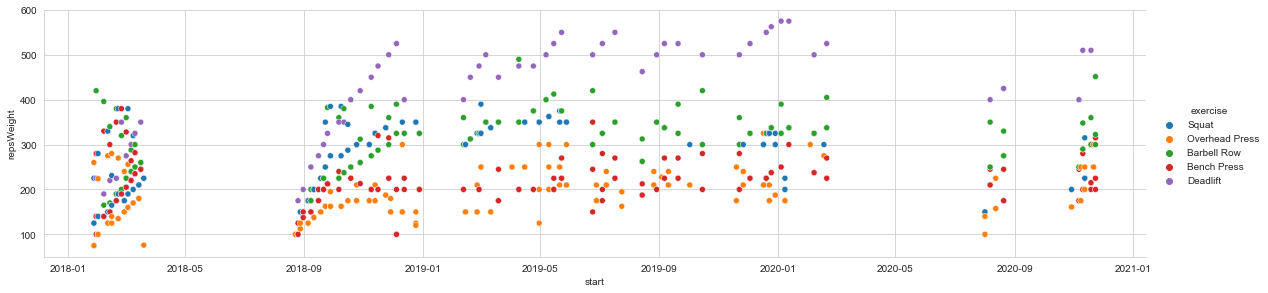

In [41]:
top5_df = sg_wkouts[sg_wkouts['exercise'].isin(top5) & (sg_wkouts['Status']=='Done')]

sns.set_style("whitegrid")
sns.relplot(x = 'start', y='repsWeight', kind = "scatter", data=top5_df, 
            #size=4, 
            aspect=4, height = 4, hue = 'exercise', legend="full")

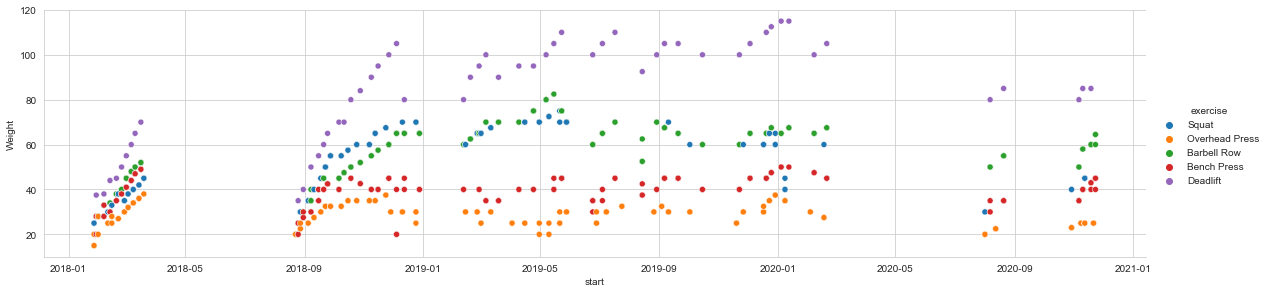

In [42]:
top5_df = sg_wkouts[sg_wkouts['exercise'].isin(top5) & (sg_wkouts['Status']=='Done')]

sns.set_style("whitegrid")
sns.relplot(x = 'start', y='Weight', kind = "scatter", data=top5_df, 
            #size=4, 
            aspect=4, height = 4, hue = 'exercise', legend="full")

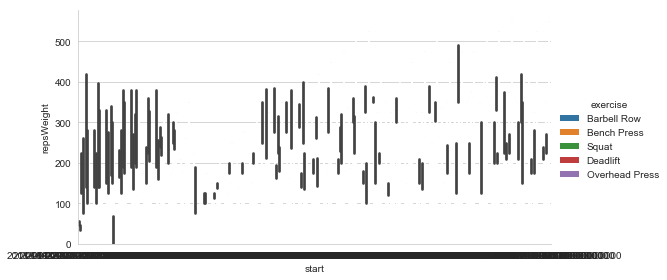

In [25]:
top5_df = sg_wkouts[sg_wkouts['exercise'].isin(top5)]

#sns.set_style("whitegrid")
sns.set_color_codes("dark")
sns.catplot(x = 'start', y='repsWeight', kind = "bar", data=top5_df, height = 4, 
            aspect=2, hue = 'exercise', legend="full")

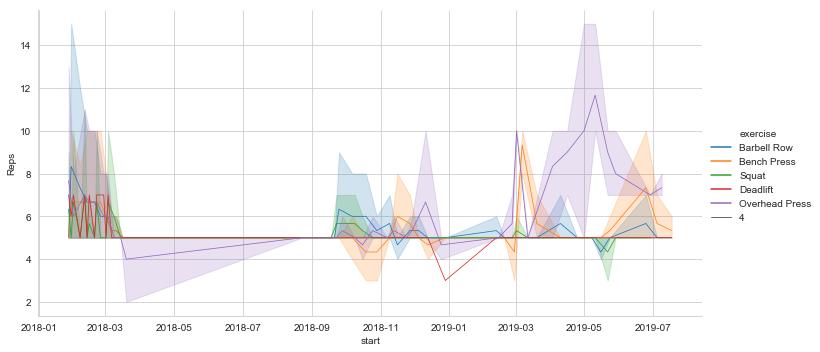

In [82]:
top5_df = sg_wkouts[sg_wkouts['exercise'].isin(top5)]

sns.set_style("whitegrid")
sns.relplot(x = 'start', y='Reps', kind = "line", data=top5_df, size=4, 
            aspect=2, hue = 'exercise', legend="full")

In [51]:
barbells = sg_wkouts[sg_wkouts['exercise']=='Barbell Row']

/Users/shgopin/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


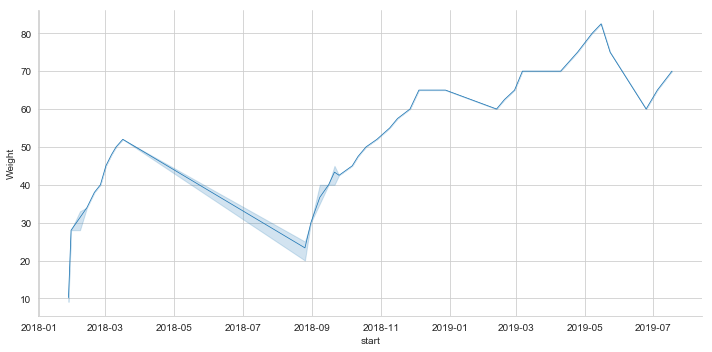

In [55]:
sns.set_style("whitegrid")
sns.relplot(x = 'start', y='Weight', kind = "line", data=barbells, size=4, aspect=2, legend=False)

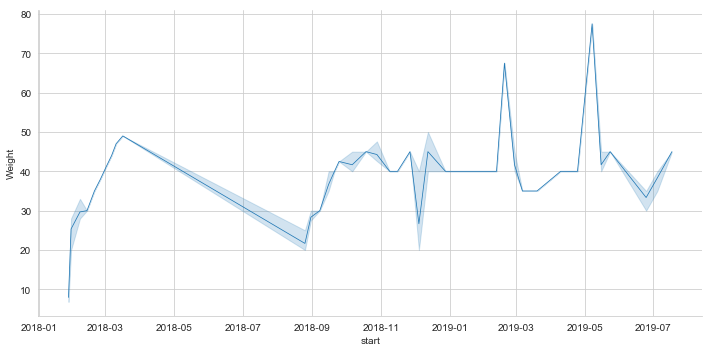

In [56]:
bench = sg_wkouts[sg_wkouts['exercise']=='Bench Press']

sns.set_style("whitegrid")
sns.relplot(x = 'start', y='Weight', kind = "line", data=bench, size=4, aspect=2, legend=False)

/Users/shgopin/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


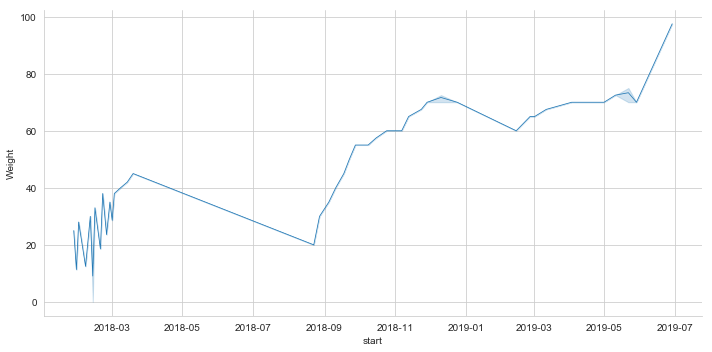

In [62]:
squats = sg_wkouts[sg_wkouts['exercise']=='Squat']

sns.set_style("whitegrid")
g = sns.relplot(x = 'start', y='Weight', kind = "line", data=squats, size=4, aspect=2, legend=False)


In [65]:
ax1 = g.axes[0]

In [ ]:
ax1.

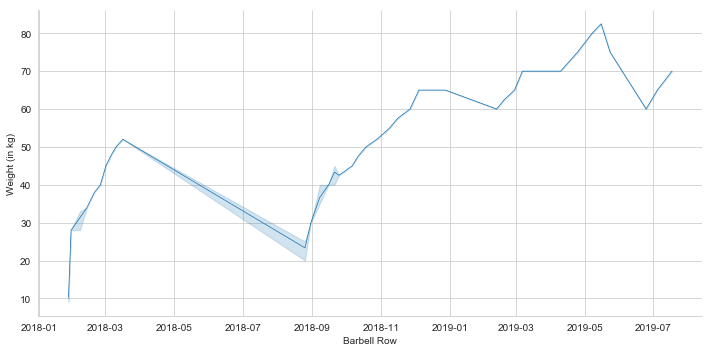

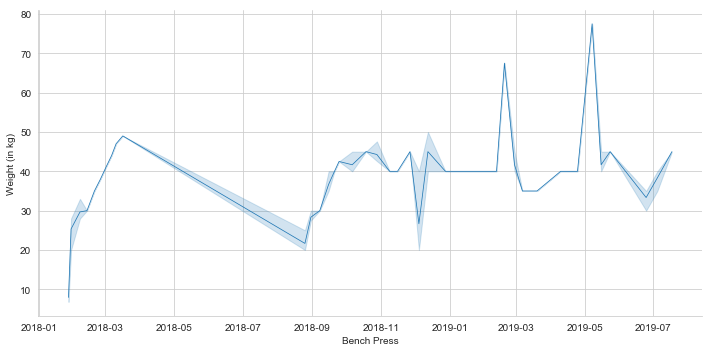

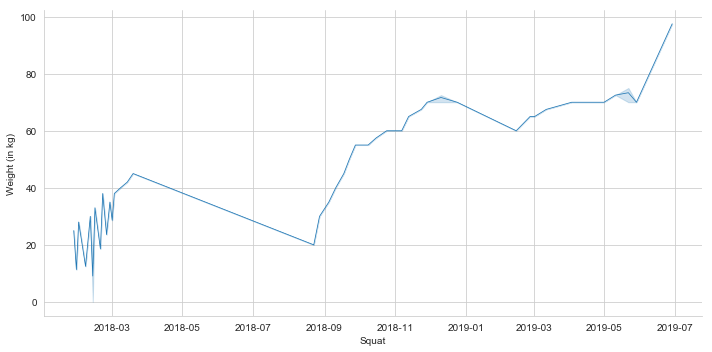

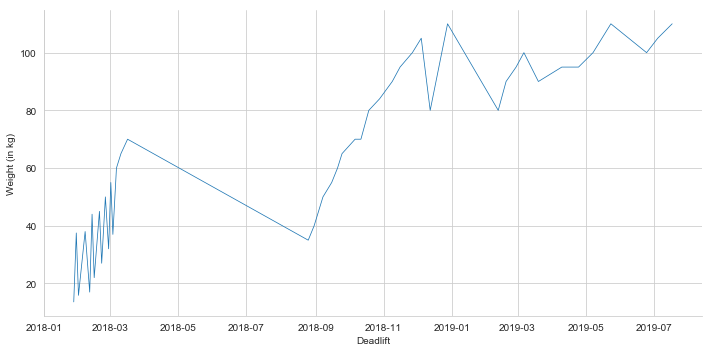

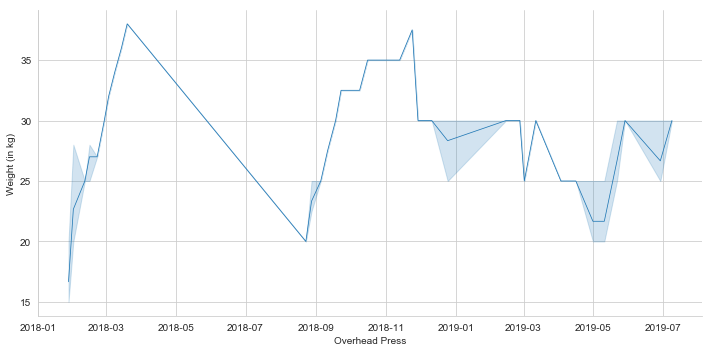

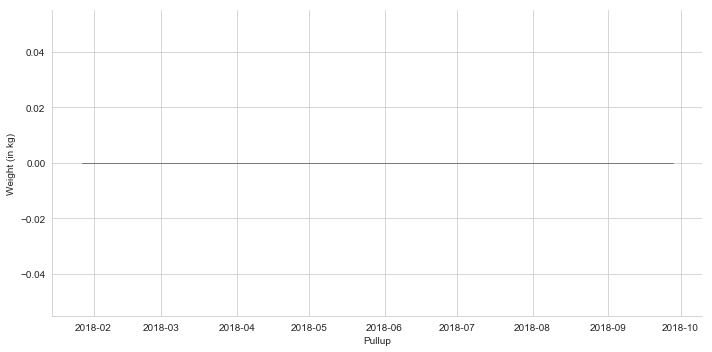

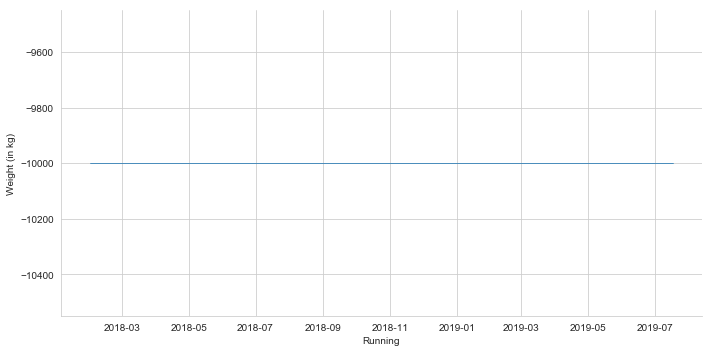

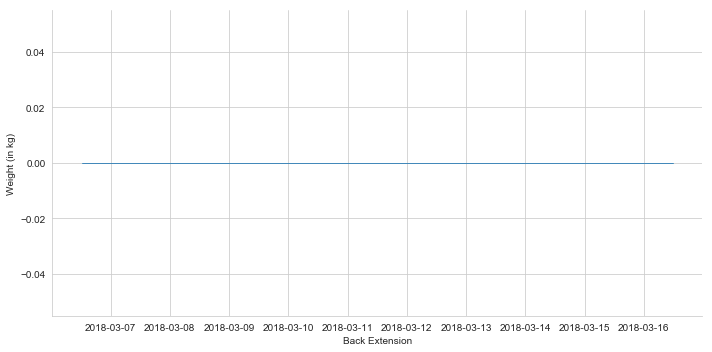

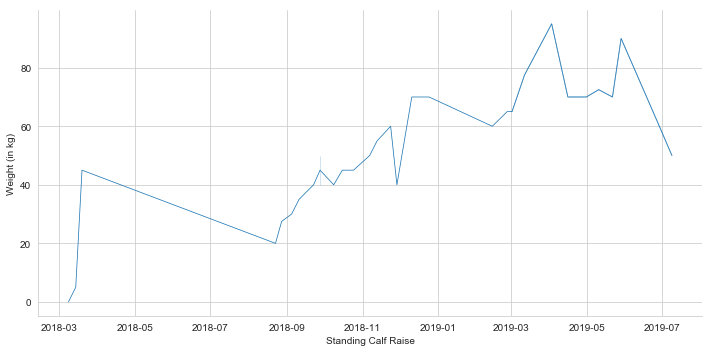

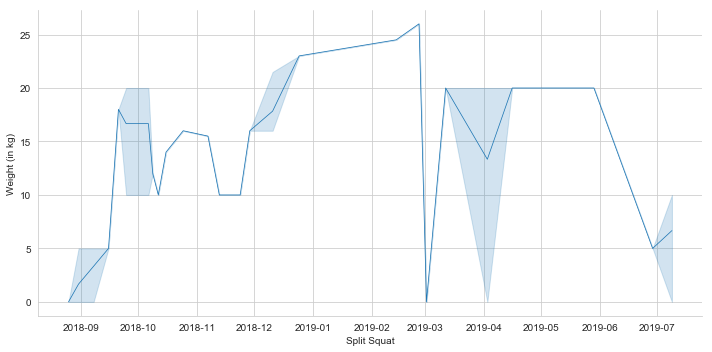

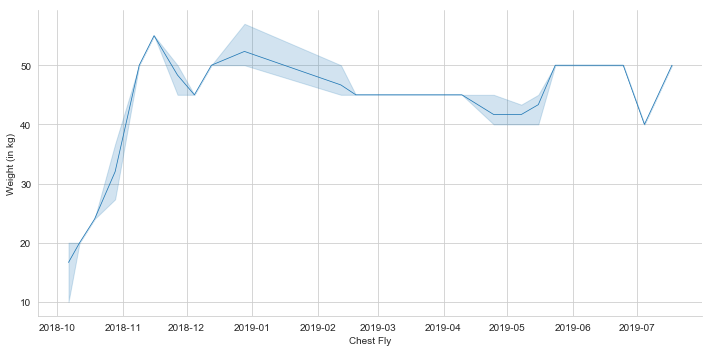

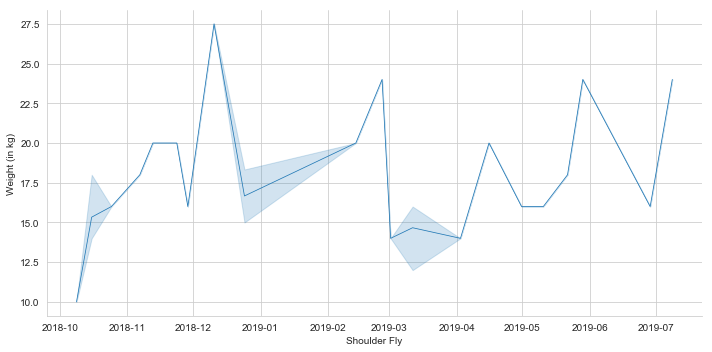

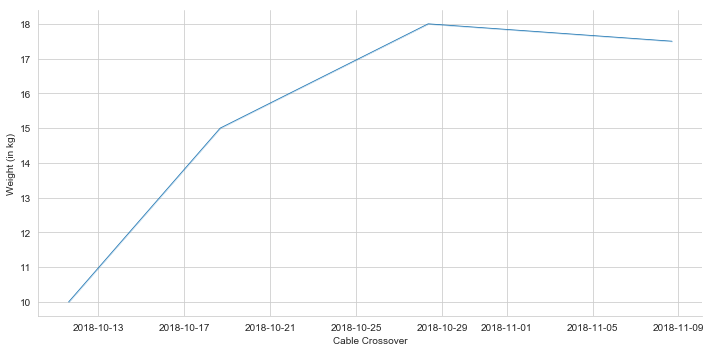

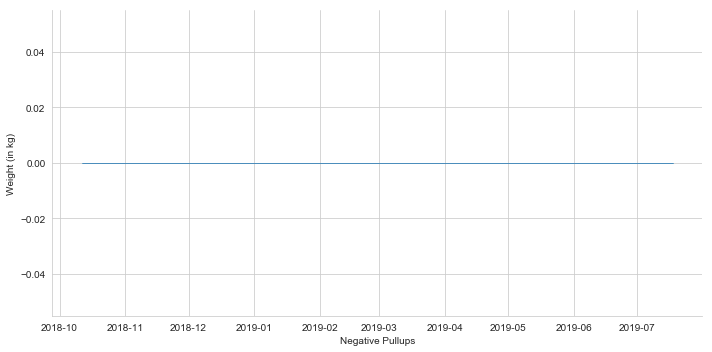

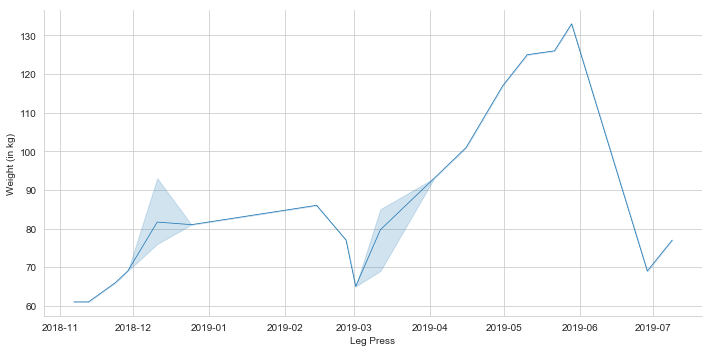

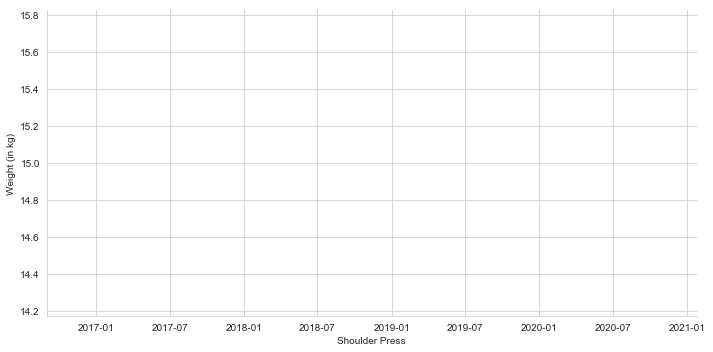

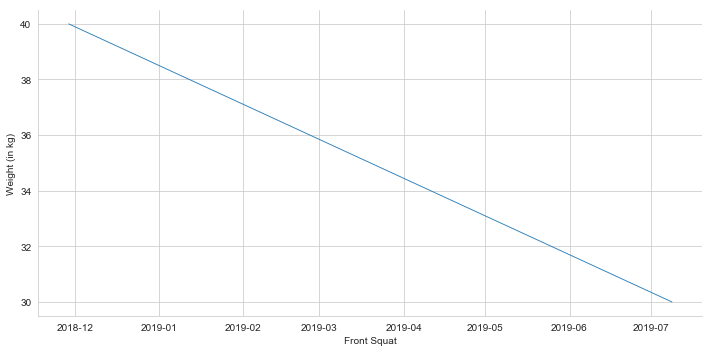

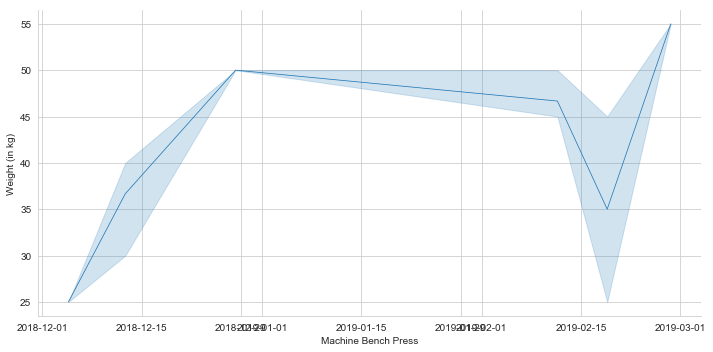

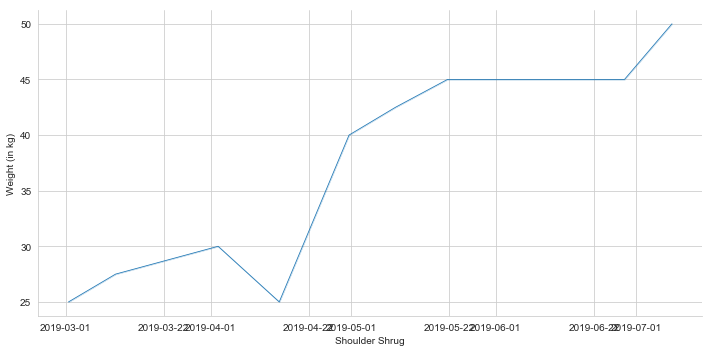

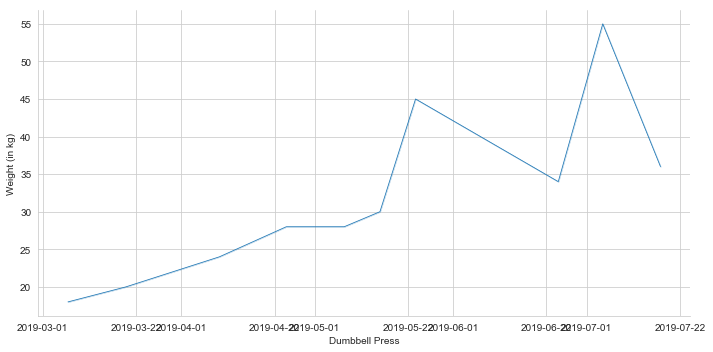

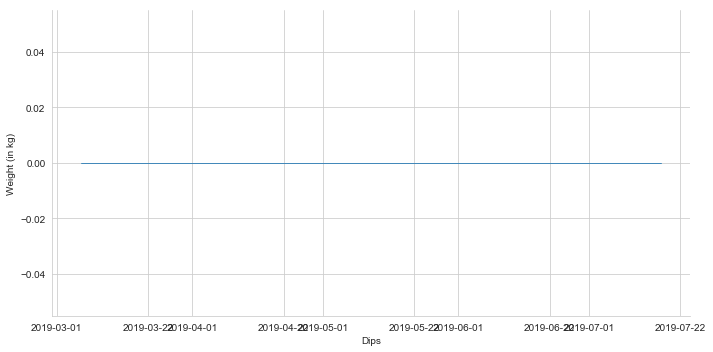

In [71]:
workouts = sg_wkouts['exercise'].unique()


for items in workouts:
    focus_df = sg_wkouts[sg_wkouts['exercise']==items]
    
    sns.set_style("whitegrid")
    g  = sns.relplot(x = 'start', y='Weight', kind = "line", data=focus_df, 
                size=4, aspect=2, legend=False)
    g.set(xlabel= items, ylabel='Weight (in kg)')
    #g.set_title(items + " Trends")
    #g.show()

AttributeError: 'numpy.ndarray' object has no attribute 'axhline'

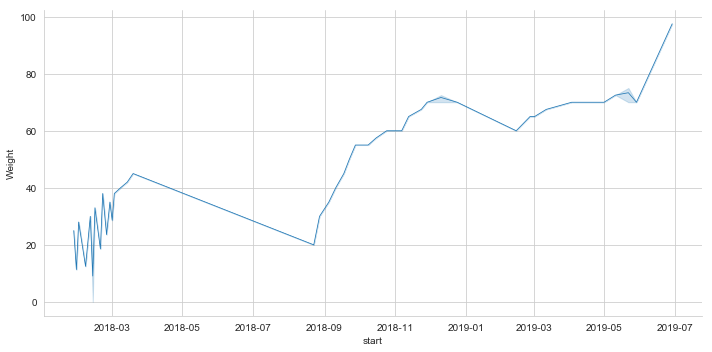

In [61]:
squats = sg_wkouts[sg_wkouts['exercise']=='Squat']

sns.set_style("whitegrid")
g = sns.relplot(x = 'start', y='Weight', kind = "line", data=squats, size=4, aspect=2, legend=False)




ax1 = g.axes[0]

ax1.axhline(10, ls='--')
#ax2.axhline(30, ls='--')

ax1.text(0.5,25, "Some text")
#ax2.text(0.5,25, "Some text")

plt.show()